## Covariance Check Notebook

Once upon a time, this notebook compared two methods of calculating the covariance of two points. 

### Method 1
- Create two point loads.
- Apply the operator A (Sl.fingerprint) to both point loads.
- Act on one of the results with Q (initialized from SL.sobolev_covariance).
- Calculate the scalar product using SL.surface_integral(lhs*rhs).

### Method 2
- Create random fields using Q.
- Use the random fields as random direct loads to solve the sea level equation (using SL.fingerprint).
- Sample the points at two locations using the SL.point_evaluation function.
- Calculate the covariance matrix for the two samples.


In [114]:
import pyshtools as pysh
import numpy as np
from numpy import pi as pi

import RFmod as RF
import SLmod as SL

In [121]:
## Preliminaries

L = 128
Q = RF.sobolev_covariance(L, s=2, mu=0.2)
rhow = SL.rhow

# read in the present day sea level and ice thickness
sl0,ice0 = SL.get_sl_ice_data(L)
C = SL.ocean_function(sl0,ice0)

lat0, lon0 =    42.3601, -71.0589   # Boston
lat1, lon1 =    40.7128, -74.0060   # New York

## Method 1

In [122]:
# Create two point loads
zeta0 = SL.point_load(L, np.array([lat0]), np.array([lon0]))
zeta1 = SL.point_load(L, np.array([lat1]), np.array([lon1]))

# Normalise the point loads
zeta0 = zeta0/np.max(zeta0.to_xarray().values)
zeta1 = zeta1/np.max(zeta1.to_xarray().values)

# Act on both with A 
Azeta0,_,_,_,_ = SL.fingerprint(C, zeta0)  
Azeta1,_,_,_,_ = SL.fingerprint(C, zeta1)

# Act on Azeta0 with Q
QAzeta0 = RF.apply_covariance(Q, Azeta0)

# Compute the scalar product (to find the covariance)
cov = SL.surface_integral(QAzeta0*Azeta1)
print('Covariance:',cov)

iteration =  1 relative change =  0.017850902089893664
iteration =  2 relative change =  0.0007689979862696953
iteration =  3 relative change =  8.838781444756473e-05
iteration =  4 relative change =  1.7156582948601395e-05
iteration =  5 relative change =  3.7289926395790837e-06
iteration =  6 relative change =  8.738448950182244e-07
iteration =  7 relative change =  2.1956081154970227e-07
iteration =  8 relative change =  5.8840283009928024e-08
iteration =  9 relative change =  1.6825476625944877e-08
iteration =  10 relative change =  5.140646319109453e-09
iteration =  1 relative change =  0.014015167689001845
iteration =  2 relative change =  0.000557411275814275
iteration =  3 relative change =  7.212672171861645e-05
iteration =  4 relative change =  1.4079004908247183e-05
iteration =  5 relative change =  3.067807298074323e-06
iteration =  6 relative change =  7.208916546959806e-07
iteration =  7 relative change =  1.816117997196227e-07
iteration =  8 relative change =  4.88052851

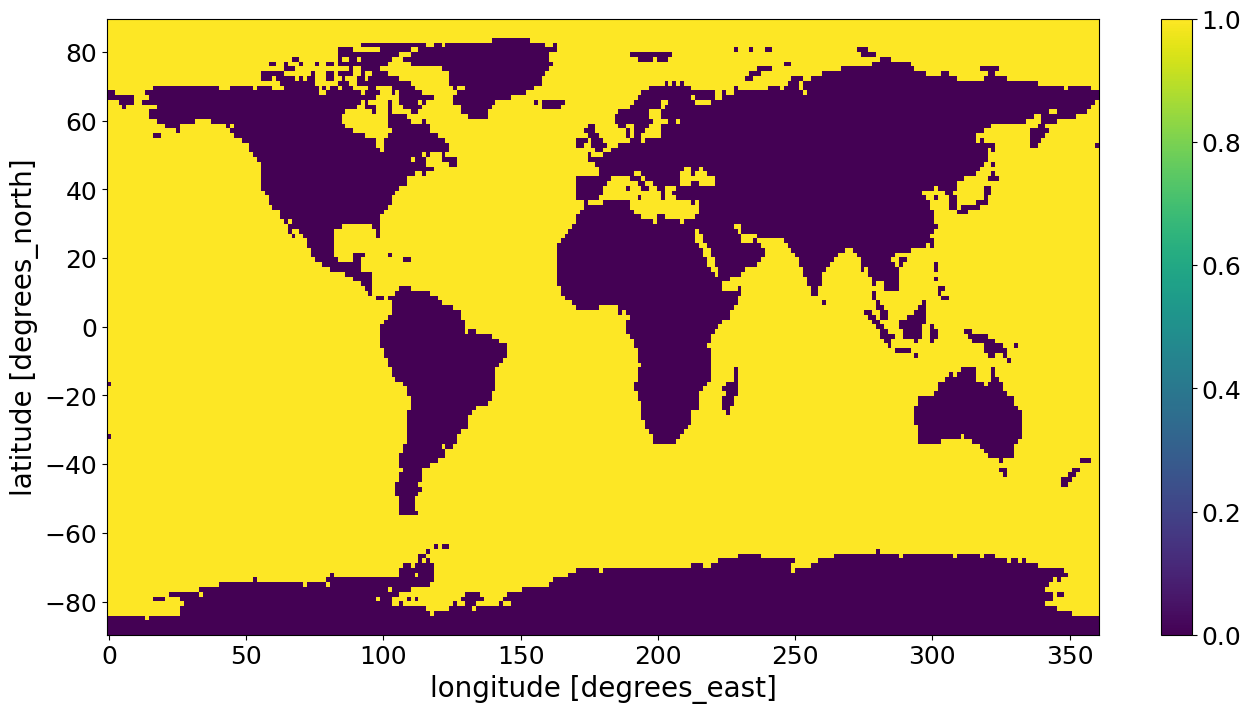

In [22]:
C.to_xarray().plot()

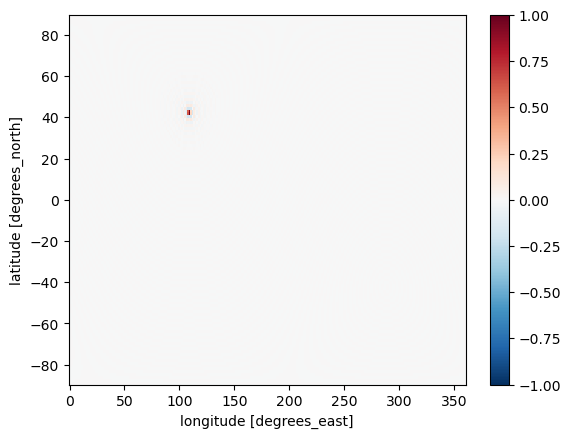

In [123]:
zeta0.to_xarray().plot()

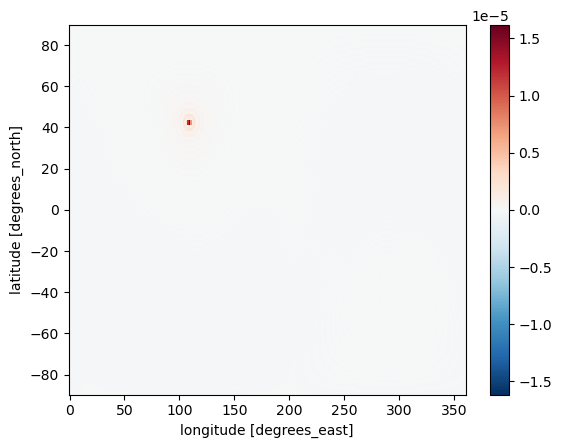

In [124]:
Azeta0.to_xarray().plot()

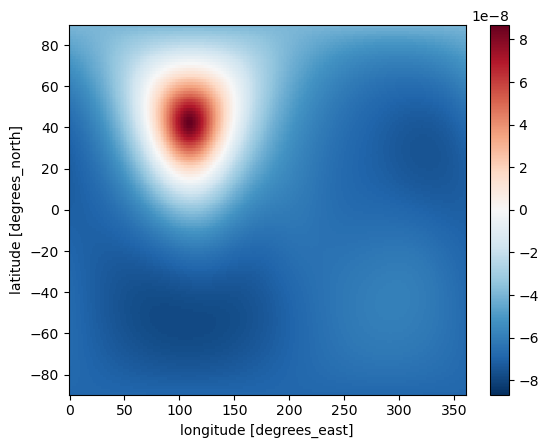

In [125]:
QAzeta0.to_xarray().plot() 

## Method 2

In [46]:
n = 10
samples = np.zeros((n,2))

for i in np.arange(0,n):

    rand_load = -rhow*RF.random_field(Q)
    rand_sl,_,_,_,_ = SL.fingerprint(C,rand_load)

    samples[i,0] = SL.point_evaluation(rand_sl, lat0, lon0)
    samples[i,1] = SL.point_evaluation(rand_sl, lat1, lon1)

cov2 = np.cov(samples.T)
print('Covariance from samples: ', cov2[0,1])


iteration =  1 relative change =  0.08466205921523492
iteration =  2 relative change =  0.016211791571630416
iteration =  3 relative change =  0.003452992352389589
iteration =  4 relative change =  0.0007908203781826205
iteration =  5 relative change =  0.00018958803186501857
iteration =  6 relative change =  4.735631134702001e-05
iteration =  7 relative change =  1.2333413167176987e-05
iteration =  8 relative change =  3.3473932389736523e-06
iteration =  9 relative change =  9.444740131986646e-07
iteration =  10 relative change =  2.797283174803101e-07
iteration =  11 relative change =  8.539363743899092e-08
iteration =  12 relative change =  2.651188033809731e-08
iteration =  13 relative change =  8.33513513362037e-09
iteration =  1 relative change =  0.09246460645277804
iteration =  2 relative change =  0.016217518039072756
iteration =  3 relative change =  0.003197295431909314
iteration =  4 relative change =  0.0006665138500613378
iteration =  5 relative change =  0.00014534972761

In [47]:
cov2

array([[0.11597318, 0.11663093],
       [0.11663093, 0.11778545]])

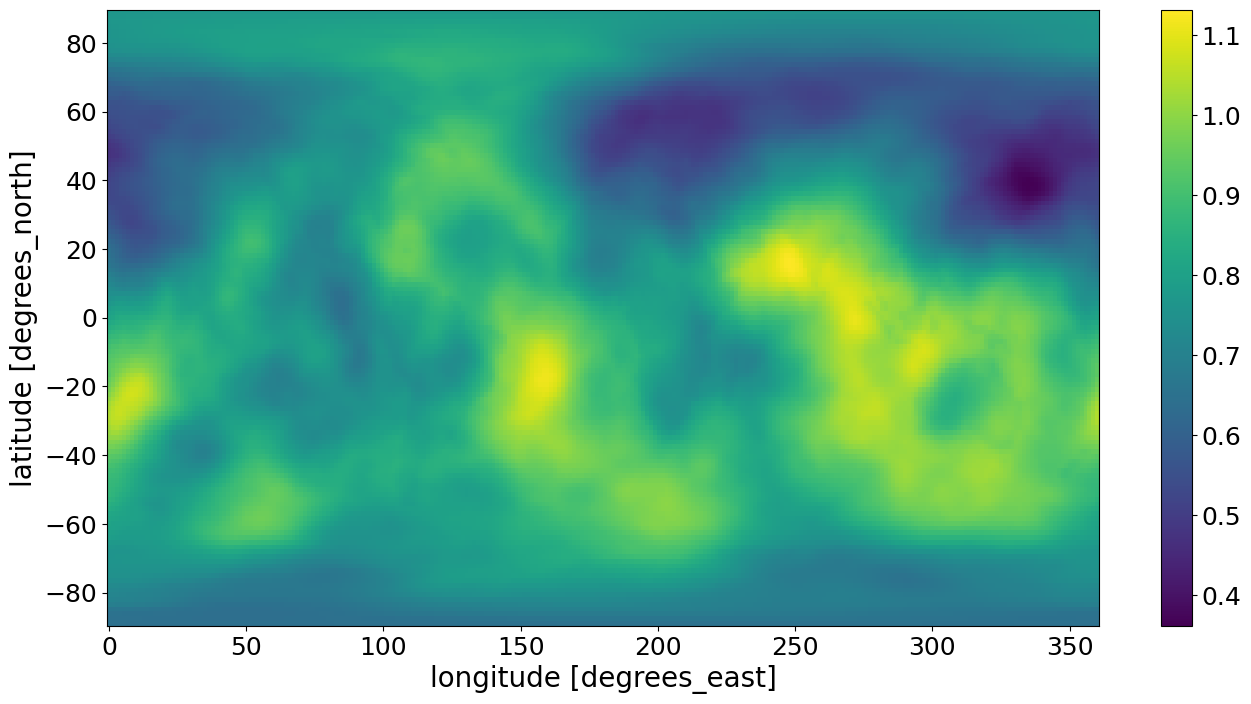

In [36]:
rand_sl.to_xarray().plot()